In [1]:
import pandas as pd
import numpy as np
import baseline
import matplotlib.pyplot as plt
import file_read

In [3]:
df=pd.read_csv('../data/PadraoK3_Gaiola_cell3eletrodos.txt', sep='\t')
df.head()

,E /V,I /uA,I /uA.1
0,0.500,0.130,7.040
1,0.499,0.102,6.998
2,0.498,0.083,6.964
3,0.497,0.064,6.932
4,0.496,0.061,6.908


In [4]:
x = pd.to_numeric(df['E /V'])
y = pd.to_numeric(df['I /uA.1'])
x1,x2=baseline.split(x)
y1,y2=baseline.split(y)


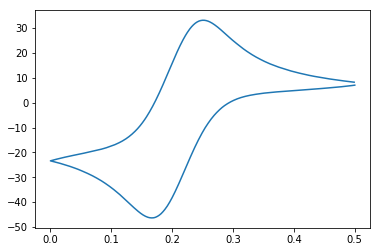

In [5]:
plt.plot(x,y)

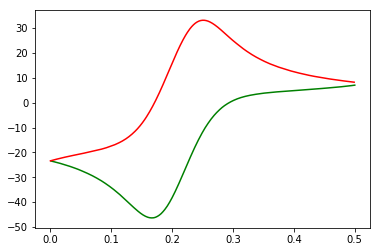

In [6]:
plt.plot(x1, y1, 'g-', x2, y2, 'r-')


In [7]:
baseline.critical_idx(x1,y1)

40

In [8]:
#find linear backgroud
y_pred1 = baseline.linear_background(x1,y1)
y_pred2 = baseline.linear_background(x2,y2)
base1 = pd.DataFrame(y_pred1)
base2 = pd.DataFrame(y_pred2)
base1.shape
a = base1.loc[: , int(base1.shape[1]/2)]
b = base2.loc[: , int(base2.shape[1]/2)]
c = base1.loc[: , 1]
d = base2.loc[: , 1]

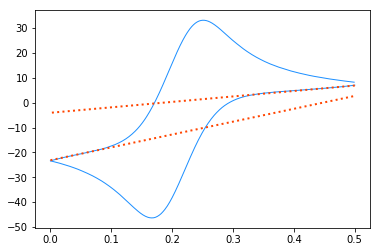

In [9]:
#find linear backgroud
y_pred1 = baseline.linear_background(x1,y1)
y_pred2 = baseline.linear_background(x2,y2)
## Plot all data 
plt.plot(x1, y1, 'dodgerblue',linewidth=1) ##darkgrey
plt.plot(x2, y2, 'dodgerblue', linewidth=1) ##dodgerblue  
plt.plot(x1, c, color = "orangered", linestyle=':',linewidth=2) 
plt.plot(x2, d, color = "orangered", linestyle=':',linewidth=2)

../data/20MM_2,7-AQDS_1M_H2SO4_500mVs_0.5step.DTA.txt Opened


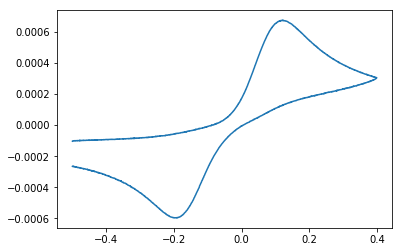

In [11]:
dict_1,n_cycle=file_read.read_file('../data/20MM_2,7-AQDS_1M_H2SO4_500mVs_0.5step.DTA.txt')
df = file_read.data_frame(dict_1,1)
%matplotlib inline
plt.plot(df['Potential'],df['Current'])

In [22]:
x = pd.to_numeric(df['Potential'])
y = pd.to_numeric(df['Current'])
x1,x2=baseline.split(x)
y1,y2=baseline.split(y)
#find linear backgroud
y_pred1 = baseline.linear_background(x1,y1)
y_pred2 = baseline.linear_background(x2,y2)
base1 = pd.DataFrame(y_pred1)
base2 = pd.DataFrame(y_pred2)
# with this you can choose your baseline based on what you want. Calleable with number.
c = base1.loc[: , 10]
d = base2.loc[: , 10]

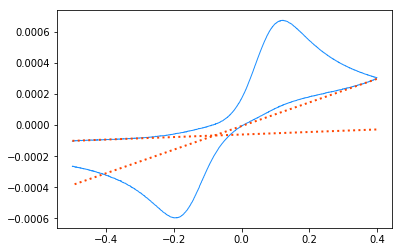

In [23]:
## Plot all data 
plt.plot(x1, y1, 'dodgerblue',linewidth=1) ##darkgrey
plt.plot(x2, y2, 'dodgerblue', linewidth=1) ##dodgerblue  
plt.plot(x1, c, color = "orangered", linestyle=':',linewidth=2) 
plt.plot(x2, d, color = "orangered", linestyle=':',linewidth=2)

## One way of solving the multi baseline issue is showed here. Basically, I turned it into pandas dataframe and chosed the df.loc[ :, 1] as baseline. 

### Trying  choosing the middle one didn't work as pleasent.